In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Hugo's Portfolio/Introducing NBEATSx to Realized Volatility Forecasting (Research)/S&P 500 Realized Volatility.xlsx",index_col='Date',parse_dates=True)


In [ ]:
df = pd.read_excel("S&P 500 Realized Volatility.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  for i in range(len(test)):
    row = [[a] for a in scaled_test_input[i:i+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

In [ ]:
scaler = MinMaxScaler()

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[1,3,5,7]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []


Best hyperparameters

Epoch: 7 | Inputs: 189 | Nodes: 56 | Dropout: 0 | Loss: mse 




# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (14):
  n_features = 2
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(len(test), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  a=np.sqrt((test-true_predictions)**2)
  a=np.delete(a,1754)
  test1=np.delete(test,1754) #needed since this value equals 0
  Accuracy.append((1-np.sum(a/test1)/(len(test)-1))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
59/59 [==============================] - 3s 10ms/step - loss: 0.0031 - accuracy: 5.3821e-04 - mean_absolute_error: 0.0383
Epoch 2/7
59/59 [==============================] - 1s 8ms/step - loss: 0.0027 - accuracy: 5.3821e-04 - mean_absolute_error: 0.0350
Epoch 3/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 5.3821e-04 - mean_absolute_error: 0.0335
Epoch 4/7
59/59 [==============================] - 1s 8ms/step - loss: 0.0024 - accuracy: 5.3821e-04 - mean_absolute_error: 0.0328
Epoch 5/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 5.3821e-04 - mean_absolute_error: 0.0329
Epoch 6/7
59/59 [==============================] - 1s 8ms/step - loss: 0.0024 - accuracy: 5.3821e-04 - mean_absolute_error: 0.0323
Epoch 7/7
55/55 [==============================] - 1s 4ms/step
Epoch 1/7
59/59 [==============================] - 4s 13ms/step - loss: 0.0029 - accuracy: 5.3821e-04 - mean_absolute_error: 0.0371
Epoch 2/7
59/59 [=

In [ ]:
RMSE

[0.0025641874337831803,
 0.0026161039344749287,
 0.0025788377321835764,
 0.0026794507862608146,
 0.0025991825935508433,
 0.0027971372630723403,
 0.002786463247376094,
 0.0026996506763493494,
 0.002661376022738765,
 0.0026700753561481696,
 0.0025808540106389156,
 0.0026241321391671114,
 0.0026159447982325506,
 0.002567556292460999,
 0.0029126557623891576]

In [ ]:
Accuracy

[62.75302920061101,
 64.98489868175665,
 65.40606900210048,
 60.12805127665424,
 63.15090323101731,
 57.043762351275994,
 59.45186922426471,
 57.97501312900326,
 60.944845747840844,
 61.38030068783754,
 64.51381396321034,
 62.775428550176294,
 62.72598443370326,
 63.043424132964134,
 49.390074977628196]

In [ ]:
Quasilikelihood

[0.09635731892715052,
 0.09179917436236544,
 0.08950119067637928,
 0.10709534287499492,
 0.09632352869739874,
 0.12099091979758293,
 0.1131760440221489,
 0.11505123024991565,
 0.10499074893382543,
 0.10353363311748788,
 0.0919567434503736,
 0.09799899481650906,
 0.09784943987283493,
 0.09564292723990643,
 0.14985353623536887]

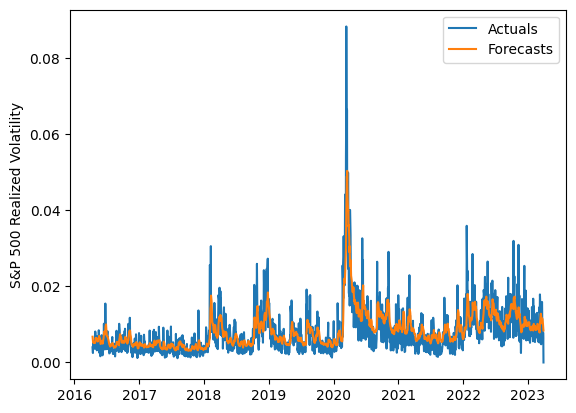

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [87]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [88]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/3)):
    row = [[a] for a in scaled_test_input[i*3:(i*3)+window_size]]
    X.append(row)
  return np.array(X)

In [90]:
for i in range (15):
  n_features = 2
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/3))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  a=np.sqrt((test-true_predictions)**2)
  a=np.delete(a,1754)
  test1=np.delete(test,1754) #needed since this value equals 0
  Accuracy.append((1-np.sum(a/test1)/(len(test)-1))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
59/59 [==============================] - 3s 11ms/step - loss: 0.0061 - accuracy: 0.1496 - mean_absolute_error: 0.0517
Epoch 2/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.2207 - mean_absolute_error: 0.0348
Epoch 3/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.2713 - mean_absolute_error: 0.0342
Epoch 4/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.1179 - mean_absolute_error: 0.0349
Epoch 5/7
59/59 [==============================] - 1s 12ms/step - loss: 0.0026 - accuracy: 0.2395 - mean_absolute_error: 0.0336
Epoch 6/7
59/59 [==============================] - 1s 13ms/step - loss: 0.0025 - accuracy: 0.2896 - mean_absolute_error: 0.0339
Epoch 7/7
19/19 [==============================] - 1s 6ms/step
Epoch 1/7
59/59 [==============================] - 3s 11ms/step - loss: 0.0032 - accuracy: 0.1200 - mean_absolute_error: 0.0396
Epoch 2/7
59/59 [===========================

In [91]:
Accuracy

[57.710148411706896,
 60.442921897253264,
 60.875933681952745,
 59.384281713331575,
 56.660042367455546,
 58.475708575971794,
 55.49791885659702,
 53.78660935361677,
 55.87498275504752,
 56.81949011514021,
 62.138003980490396,
 65.45328039298589,
 63.738070074708354,
 59.00959755213354,
 61.34640463541095]

In [92]:
RMSE

[0.0028642297007777516,
 0.002762946022048737,
 0.0028067770796517777,
 0.0028305771205278957,
 0.00283201066823305,
 0.00278668997722149,
 0.002904774432415429,
 0.002883483455091358,
 0.0028623022801083204,
 0.0028633133990983283,
 0.0027813091345003423,
 0.002812709540335331,
 0.002753299895078149,
 0.002802507221545922,
 0.002774894703140037]

In [93]:
Quasilikelihood

[0.12042259970501815,
 0.10957349409332225,
 0.10931959988702789,
 0.11463987708492868,
 0.1220849875300688,
 0.11533261523924118,
 0.1291529281148624,
 0.1327403230551553,
 0.12614046986319752,
 0.12329287084685911,
 0.10524360444003746,
 0.0973305534363611,
 0.09972292080826482,
 0.1145520029145475,
 0.10709060417747411]

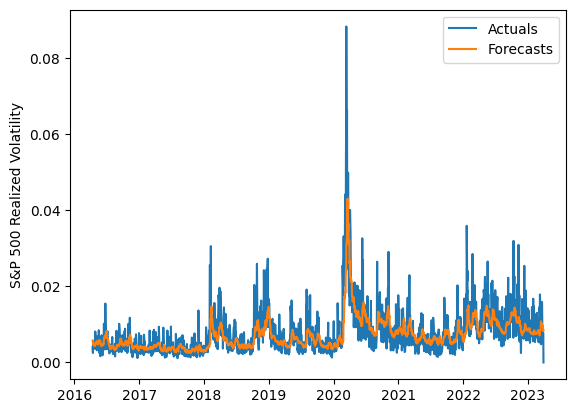

In [94]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [95]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [96]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/5)):
    row = [[a] for a in scaled_test_input[i*5:(i*5)+window_size]]
    X.append(row)
  return np.array(X)

In [97]:
for i in range (15):
  n_features = 2
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/5))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  a=np.sqrt((test-true_predictions)**2)
  a=np.delete(a,1754)
  test1=np.delete(test,1754) #needed since this value equals 0
  Accuracy.append((1-np.sum(a/test1)/(len(test)-1))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
59/59 [==============================] - 4s 11ms/step - loss: 0.0045 - accuracy: 0.0151 - mean_absolute_error: 0.0442
Epoch 2/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.1588 - mean_absolute_error: 0.0358
Epoch 3/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.2330 - mean_absolute_error: 0.0353
Epoch 4/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.2869 - mean_absolute_error: 0.0337
Epoch 5/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.2126 - mean_absolute_error: 0.0334
Epoch 6/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.3025 - mean_absolute_error: 0.0331
Epoch 7/7
11/11 [==============================] - 0s 4ms/step
Epoch 1/7
59/59 [==============================] - 3s 11ms/step - loss: 0.0033 - accuracy: 0.0377 - mean_absolute_error: 0.0392
Epoch 2/7
59/59 [=============================

In [98]:
Accuracy

[53.97585455195166,
 55.936412590927944,
 57.06429663098157,
 60.811645455216336,
 60.978033604977064,
 57.7827892811859,
 60.93528442196418,
 62.83982392628786,
 57.0719426790171,
 62.85573951498412,
 59.99894946329884,
 53.78188120803627,
 53.87731011685186,
 52.234800871473894,
 53.433920435274786]

In [99]:
RMSE

[0.0029935875666975927,
 0.0029092492847155936,
 0.002931746252229064,
 0.002879395018898954,
 0.0028785593415240063,
 0.0028706947582405567,
 0.002880098219106323,
 0.0028797331789545957,
 0.002867263809408351,
 0.0028297941693613037,
 0.002829943486086625,
 0.0029519601251739008,
 0.00297086354143069,
 0.002979490847390431,
 0.002962233454016835]

In [100]:
Quasilikelihood

[0.1365464404357162,
 0.12880051243714882,
 0.12732640783407703,
 0.1127199500883882,
 0.11316788502474275,
 0.12184256237406912,
 0.113283444305611,
 0.10763675844717138,
 0.12335569163645924,
 0.10619332809674241,
 0.11399613609273496,
 0.13723099896985744,
 0.13589943377268268,
 0.14268175586210657,
 0.13811588022071997]

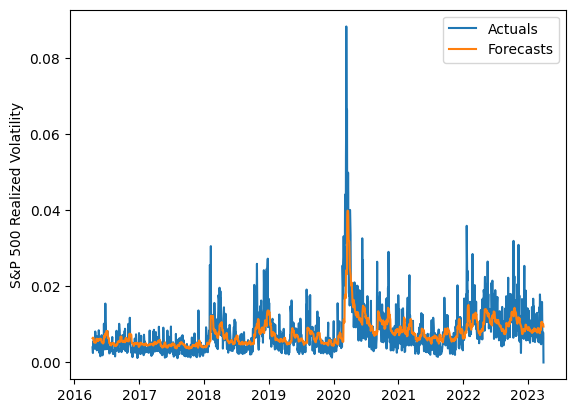

In [101]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [102]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [120]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/10)):
    row = [[a] for a in scaled_test_input[i*10:(i*10)+window_size]]
    X.append(row)
  return np.array(X)

In [121]:
for i in range (15):
  n_features = 2
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-5]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/10))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
59/59 [==============================] - 3s 11ms/step - loss: 0.0039 - accuracy: 0.0727 - mean_absolute_error: 0.0425
Epoch 2/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.0463 - mean_absolute_error: 0.0344
Epoch 3/7
59/59 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 0.0318 - mean_absolute_error: 0.0340
Epoch 4/7
59/59 [==============================] - 1s 13ms/step - loss: 0.0026 - accuracy: 0.0307 - mean_absolute_error: 0.0338
Epoch 5/7
59/59 [==============================] - 1s 13ms/step - loss: 0.0025 - accuracy: 0.0258 - mean_absolute_error: 0.0336
Epoch 6/7
59/59 [==============================] - 1s 13ms/step - loss: 0.0025 - accuracy: 0.0371 - mean_absolute_error: 0.0331
Epoch 7/7
6/6 [==============================] - 0s 4ms/step
Epoch 1/7
59/59 [==============================] - 3s 11ms/step - loss: 0.0046 - accuracy: 0.1071 - mean_absolute_error: 0.0449
Epoch 2/7
59/59 [===========================

In [122]:
Accuracy

[58.68214396264144,
 53.27347261441264,
 53.64951677010594,
 58.69121663722282,
 50.500467149836645,
 48.72557701823473,
 54.14035965995612,
 57.794149913736014,
 53.47844562838462,
 60.79356523988222,
 56.18464752445662,
 51.97032675118221,
 57.707694076332835,
 51.85704914903645,
 62.1825779396028]

In [123]:
RMSE

[0.0030155346658981086,
 0.0031051380749277024,
 0.0030590204649545904,
 0.0030393153489874283,
 0.003173426831001715,
 0.003211251255128219,
 0.0030625655590990225,
 0.0030143868225360336,
 0.003061828774130859,
 0.0030133976181736734,
 0.003041250541015052,
 0.0031058728698891615,
 0.003035743532632238,
 0.003118910589921772,
 0.003138571350994346]

In [124]:
Quasilikelihood

[0.12612684747271274,
 0.14455017591319352,
 0.14251973883522562,
 0.1268496599182038,
 0.15467383086650457,
 0.16166495389796498,
 0.14112936447627827,
 0.12812418381119342,
 0.14371264210760876,
 0.12089311195569397,
 0.13394363838688866,
 0.14885512426699263,
 0.1292328975976968,
 0.1484144031789606,
 0.12072253281717844]

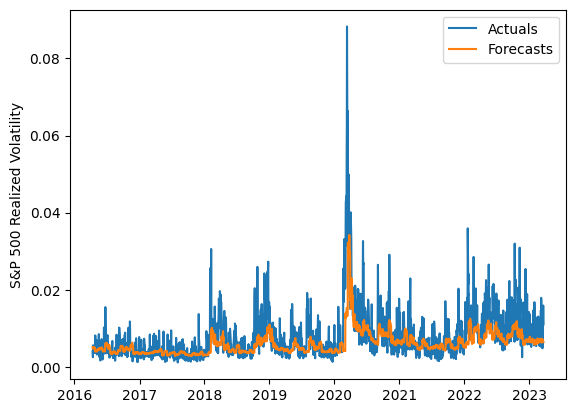

In [125]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions)  
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [126]:
len(test)%22

12

In [127]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [128]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/22)):
    row = [[a] for a in scaled_test_input[i*22:(i*22)+window_size]]
    X.append(row)
  return np.array(X)

In [130]:
for i in range (15):
  n_features = 2
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-17]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/22))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
59/59 [==============================] - 3s 13ms/step - loss: 0.0057 - accuracy: 0.0361 - mean_absolute_error: 0.0487
Epoch 2/7
59/59 [==============================] - 1s 13ms/step - loss: 0.0030 - accuracy: 0.0226 - mean_absolute_error: 0.0361
Epoch 3/7
59/59 [==============================] - 1s 13ms/step - loss: 0.0026 - accuracy: 0.0097 - mean_absolute_error: 0.0343
Epoch 4/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.0145 - mean_absolute_error: 0.0336
Epoch 5/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.0097 - mean_absolute_error: 0.0338
Epoch 6/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.0161 - mean_absolute_error: 0.0333
Epoch 7/7
3/3 [==============================] - 0s 6ms/step
Epoch 1/7
59/59 [==============================] - 3s 11ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0440
Epoch 2/7
59/59 [=========================

3/3 [==============================] - 0s 7ms/step
Epoch 1/7
59/59 [==============================] - 3s 11ms/step - loss: 0.0050 - accuracy: 0.0689 - mean_absolute_error: 0.0478
Epoch 2/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.0743 - mean_absolute_error: 0.0363
Epoch 3/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.0102 - mean_absolute_error: 0.0351
Epoch 4/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.0027 - mean_absolute_error: 0.0341
Epoch 5/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 5.3821e-04 - mean_absolute_error: 0.0336
Epoch 6/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.0210 - mean_absolute_error: 0.0333
Epoch 7/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 0.0027 - mean_absolute_error: 0.0327


3/3 [==============================] - 0s 6ms/step
Epoch 1/7
59/59 [==============================] - 3s 15ms/step - loss: 0.0047 - accuracy: 0.0560 - mean_absolute_error: 0.0459
Epoch 2/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.0054 - mean_absolute_error: 0.0358
Epoch 3/7
59/59 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.0759 - mean_absolute_error: 0.0361
Epoch 4/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.0307 - mean_absolute_error: 0.0346
Epoch 5/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.0888 - mean_absolute_error: 0.0335
Epoch 6/7
59/59 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.0657 - mean_absolute_error: 0.0333
Epoch 7/7
3/3 [==============================] - 0s 6ms/step
Epoch 1/7
59/59 [==============================] - 3s 11ms/step - loss: 0.0041 - accuracy: 0.0097 - mean_absolute_error: 0.0

In [131]:
Accuracy

[55.01792053455078,
 53.16677648208936,
 46.65869467481565,
 53.911556169444495,
 46.75428664048115,
 51.47801604530069,
 49.58178945594792,
 48.45442378733675,
 50.60835982503071,
 56.25291392538705,
 52.11031486248776,
 59.77548348063246,
 56.145497734410974,
 56.540204665306845,
 51.266721633158795]

In [132]:
RMSE

[0.0033296372250202003,
 0.003317788013068226,
 0.0035436150129694375,
 0.0033147579402472097,
 0.003455208452020352,
 0.0033734081172661114,
 0.0034525280780987634,
 0.0033974670470118366,
 0.0033928750478896285,
 0.003281227842588777,
 0.0033656044471107862,
 0.0032904799902305337,
 0.003273144581139633,
 0.0032801515160642463,
 0.003332868715726916]

In [133]:
Quasilikelihood

[0.14487983572528895,
 0.15009593991572284,
 0.1755745173304809,
 0.14791870972411797,
 0.17388058636325285,
 0.15704595834350843,
 0.16445266356644084,
 0.16784240130340458,
 0.15968857698922073,
 0.14086059224206857,
 0.15503245875917315,
 0.1341544745508453,
 0.14110086082537218,
 0.14053705959708504,
 0.1579717320113305]

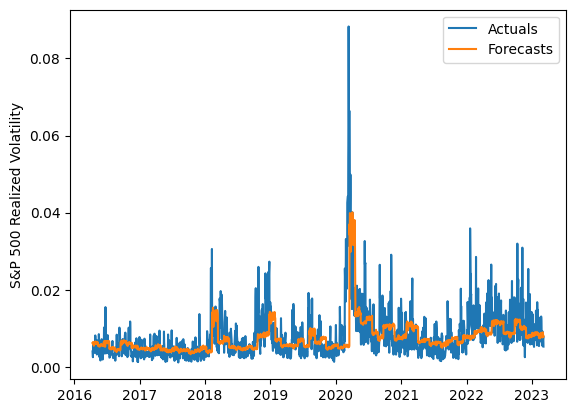

In [134]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions)  
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])